# ADS 2017. Homework 1

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02.

(c) There could be some strong linear relationship between $x$ and $y$.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

My Answer: (d)

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'<3y$ if b is less than one.

(b) $y'=3y$ in any case.

(c) $y'$ increases by $(2^b-1)*100\%$.

(d) $y'>3y$ if b is bigger than one.

My Answer: (a)(d)

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline
import math

### Question (3): (30 pt)


In [3]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [4]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [5]:
data = pd.DataFrame(data=[x, y]).T
data.columns = [ 'x', 'y']
data.head()

,x,y
0,0.0,14.0
1,1.0,12.0
2,2.0,18.0
3,3.0,-4.0
4,4.0,14.0


In [6]:
data.corr()

,x,y
x,1.000000,0.956301
y,0.956301,1.000000


In [7]:
u1 = np.mean(x)
u2 = np.mean(y)
a = x - u1
b = y - u2
sum1 = (a*b).sum()
sum2 = (a**2).sum()
sum3 = (b**2).sum()
correlation = sum1/math.sqrt(sum2*sum3)
correlation

0.95630100511156413

#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [8]:
#get xy and x-squred term 
data.loc[:,"x_sqr"]=data.x*data.x
data.loc[:,"xy"]=data.x*data.y
data.head(3)

,x,y,x_sqr,xy
0,0.0,14.0,0.0,0.0
1,1.0,12.0,1.0,12.0
2,2.0,18.0,4.0,36.0


In [9]:
#Let's calculate w1. 
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 5.288721804511278


In [10]:
#let's calculate w0.
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 1.9571428571428608


In [74]:
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
data.head(3)

,x,y,x_sqr,xy,pred,err
0,0.0,14.0,0.0,0.0,1.957143,12.042857
1,1.0,12.0,1.0,12.0,7.245865,4.754135
2,2.0,18.0,4.0,36.0,12.534586,5.465414


In [76]:
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
print("R^2 is : {}".format(R_2))

R^2 is : 0.9145116123773878


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [11]:
lm = smf.ols(formula='y ~ x', data = data).fit()

In [12]:
print (lm.params)
print (lm.rsquared)

Intercept    1.957143
x            5.288722
dtype: float64
0.914511612377


In [13]:
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           4.71e-11
Time:                        18:46:19   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.6

### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [4]:
data_4=pd.read_csv("data/Housing_Pluto_Session2.csv")
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


In [6]:
data_4.ZipCode.unique()

array([ 11201.,     nan,  11217.,  11241.,  11231.,  11215.,  11232.,
        11220.,  11218.,  11238.,  11226.,  11225.,  11216.,  11213.,
        11203.,  11233.,  11212.,  11221.,  11207.,  11206.,  11205.,
        11251.,  11249.,  11211.,  11237.,  11222.,  11236.,  11208.,
        11416.,  11239.,  11234.,  11210.,  11230.,  11229.,  11219.,
        11204.,  11209.,  11228.,  11214.,  11223.,  11224.,  11235.])

#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [42]:
df = data_4[(data_4['LotArea'] != 0) & (data_4['AssessTot'] != 0)] 
data_4 = df.dropna()
df.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
5,11201.0,8120,5976000


#### (b). Visualize the data set.

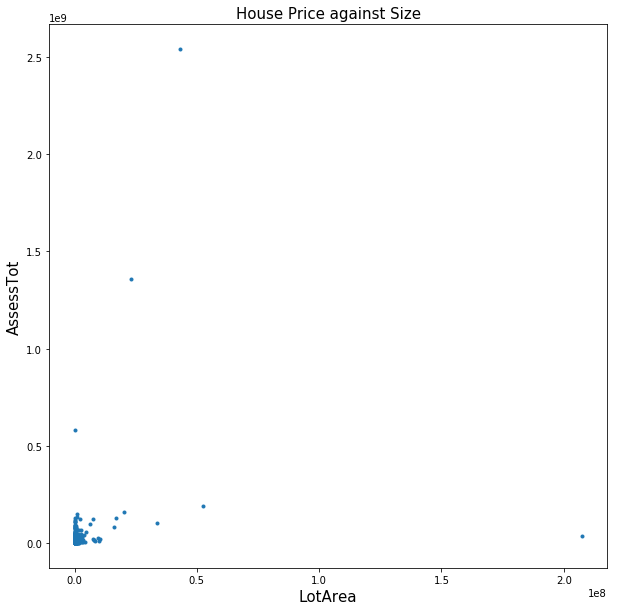

In [43]:
plt.figure(figsize = (10,10))
plt.plot(df.LotArea,df.AssessTot, '.')
plt.ylabel('AssessTot',fontsize = 15)
plt.xlabel('LotArea',fontsize = 15)
plt.title('House Price against Size',fontsize = 15)

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [44]:
lm2 = smf.ols(formula='AssessTot ~ LotArea', data = data_4).fit()

In [45]:
print (lm2.params)
print ('R^2        ' + str(lm2.rsquared))

Intercept    76868.391376
LotArea         21.160305
dtype: float64
R^2        0.38447323434


w1 = 21.160305

w2 = 76868.391376

R^2 = 0.38447323434

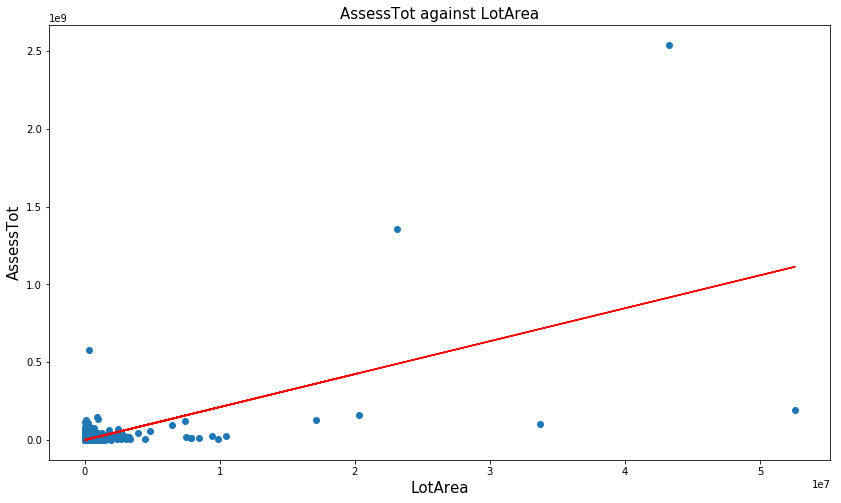

In [52]:
plt.figure(figsize=(14,8))
plt.plot( data_4['LotArea'], data_4['AssessTot'], 'o')
plt.title('AssessTot against LotArea', fontsize = 15)
plt.xlabel('LotArea', fontsize = 15)
plt.ylabel('AssessTot', fontsize = 15)
plt.plot(data_4['LotArea'], lm2.predict(), '-r')

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [63]:
lm3 = smf.ols(formula='AssessTot ~ LotArea-1', data = data_4).fit()
print (lm3.params)
print ('R^2   ' + str(lm3.rsquared))

LotArea    21.173995
dtype: float64
R^2   0.384928026064


w1 = 21.173995

w2 = 0

R^2 = 0.384928026064

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [71]:
data_4['Log_LotArea'] = np.log(data_4.LotArea)
data_4['Log_AssessTot'] = np.log(data_4.AssessTot)
lm4 = smf.ols(formula='Log_AssessTot ~ Log_LotArea', data = data_4).fit()

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
print (lm4.params)
print ('R^2                     ' + str(lm4.rsquared))

Intercept      0.208794
Log_LotArea    1.324973
dtype: float64
R^2                     0.490706561371


w1 means that a 1% increase in the average house size would yield a 1.32% increase in the average house price.

w1 = 1.324973

w2 = 0.208794

R^2 = 0.490706561371

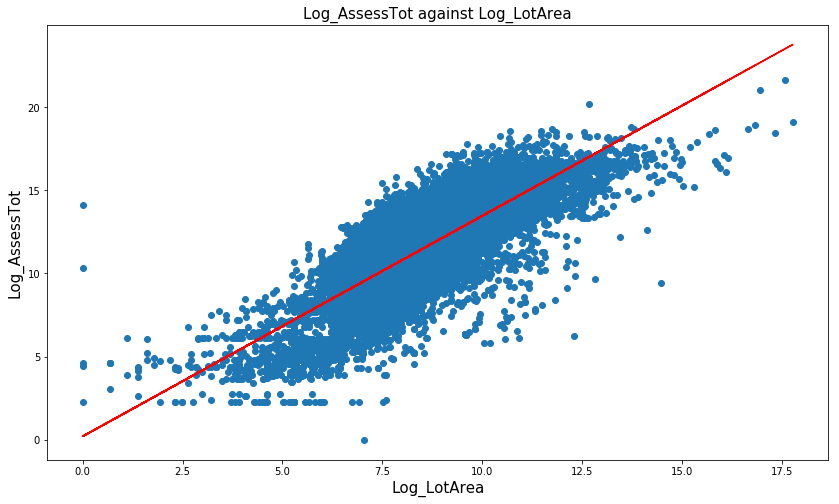

In [73]:
plt.figure(figsize=(14,8))
plt.plot(data_4.Log_LotArea, data_4.Log_AssessTot, 'o')
plt.title('Log_AssessTot against Log_LotArea', fontsize = 15)
plt.xlabel('Log_LotArea', fontsize = 15)
plt.ylabel('Log_AssessTot', fontsize = 15)
plt.plot(Log_LotArea, lm4.predict(), '-r')

For every unit increase in house areas, the house price will increase by 1.32